EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## A. Types of tests

### A.1. One-sample test:

**Önceden ortalaması bilinen bir dağılım ile elimizdeki örneklemi karşılaştırmak için kullanılır.  Aynı zamanda elde edilen örneklemin var sayılan bir dağılımdan fark gösterip göstermediğini test etmek için de uygulanabilir.**


Test this null hypothesis : the population mean for the treatment group is not significantly different from known value x. 
**(Ho : μ = x)**

The alternative hypothesis: the population mean is not equal to c or,
**(H1: μ ≠ c)**


Example:   The speed of light in a vacuum c is a well-known constant of nature. (In fact it is the same everywhere in the universe.) Measurements of the speed of light in water are taken. Test the null hypothesis that the speed of light in water is not significantly different than the speed of light in a vacuum.

### A.2. Paired Two-sample test (dependent):

Bu test, **bir grup insana aynı anketi iki kez verdiğiniz zaman içindir.** Eşleştirilmiş bir t-testi, birinci ve ikinci anket arasında ortalamanın değişip değişmediğini size bildirir.

En tipik örneği aynı deneğin birden fazla teste tabi tutulduğu durumlarda ilk örnek ile sonraki örneklerin karşılaştırılması için kullanılmasıdır. Örneğin bir tedavi protokolü başlamadan önce kilosu ölçülen hastaların tedavi bitiminde ölçülen kilosu ile karşılaştırılması için bağımlı örneklem t-testi uygulanır. Bağımsız örneklem testinden farkı önce ve sonra değerlerinin her denek için eşleştirilerek aradaki farkın tüm örneklem için istatistiki oalrak bir fark gözetip gözetmediğinin incelenmesidir. İki farklı normal dağılımdan çekilmiş iki farklı örneklem olduğu varsayılmaz. Tek bir normal dağılımdan elde edilen bir örneklem test edilir.

**This test is for when you GIVE ONE GROUP OF PEOPLE THE SAME SURVEY TWICE. A paired t-test lets you know if the mean changed between the first and second survey.**

**Use a paired sample test when there is a natural one-to-one pairing between the subjects in two treatment groups.** 

In this case, the difference scores di = x2i - x1i can be computed and a one-sample test performed using the null hypothesis that the mean of the difference is not significantly different than zero: 
**(Ho : μdiff = 0)**

The alternative hypothesis is:
**(H1 / μdiff != 0) **


Example:   A sample of houses is chosen. For each house, a section is painted with a new paint and a section is painted with a standard paint. For each house, measure the difference between the lifetime of the new paint minus the lifetime of the standard paint. Test the null hypothesis that differences are not significantly different than zero.

Example2: You surveyed the same group of customers twice: once in April and a second time in May, after they had seen an ad for your company. Did your company’s NPS change after customers saw the ad?

**!! Note that while t-tests can tell you if something is significantly different, it’s up to you to determine whether that difference is meaningful. !! Small differences can be statistically different if the sample size is large enough.!!**

### A.3. Independent Two-sample test (for the mean):

**Bu test, iki bağımsız grubun ortalamalarının birbirinden önemli ölçüde farklı olup olmadığını inceler.**

Burada kritik olan nokta gruplara dahil olma şartının incelenen değişkenden tamamen bağımsız olmasıdır. Başka bir deyişle **karşılaştırılan iki grup (ya da iki örneklem) BİRBİRİ İLE İLİNTİLİ OLMAMALIDIR.** Örneğin bir çalışmada kadınlar ile erkeklerin ortalama gelirlerinin farklı olup olmadığı, bir medikal araştırmada iki farklı ilaç tedavisi gören hastaların vücut kitle endekslerinin (BMI) farklılık gösterip göstermediği, bir kanser ilacı deneme araştırmasında kontrol (plasebo) ve deney (ilaç) gruplarının tümör büyüklüğü bakımından fark gösterip göstermediği gibi.

**This test examines whether the means of two independent groups are significantly different from one another.**

Use the independent two-sample test when there is not a natural one-to-one pairing between the subjects in two treatment groups.

The null hypothesis that the population means of the two groups are not significantly different 
**(H0: μA = μB)**

The alternative hypothesis is 
**(H0: μA ≠ μB)**


Example:   A gasoline additive is supposed to reduce the amount of carbon monoxide in automobile exhaust. A sample of automobiles are chosen. Half of them are given the additive; half of them are not. Test the null hypothesis that the amount of CO in the exhaust is not significantly different for the cars with the additive than it is for the cars without the additive.

# B. Descriptions of Tests for One or Two Samples :

Here are six commonly used tests of hypothesis. Follow each link for details and a sample problem:
 
**One-sample z-test**
 
Experimental Design:  The sample forms a single treatment group.
H0:  The population mean of the treatment group is not significantly different from a given constant.
Population Distribution:  Arbitrary.
Sample Size:  n > 30

**One-sample t-test**
 
Experimental Design:  The sample forms a single treatment group.
H0:  The population mean of the treatment group is not significantly different from a given constant.
Population Distribution:  Close to normal.
Sample Size:  Arbitrary.

**Paired-sample z-test**
 
Experimental Design:  There is no natural pairing between subjects in the two groups.
H0:  The mean of the sample differences is not significantly different from 0.
Population Distribution:  Arbitrary.
Sample Size:  n ≥ 30 for both groups.

**Paired-sample t-test**
 
Experimental Design:  There is no natural pairing between subjects in the two groups.
H0:  The mean of the sample differences is not significantly different from 0.
Population Distribution:  Approximately normal within each group.
Sample Size:  Arbitrary for both groups.
SAS and R Examples:  ReadingPaired
Detailed description of paired two-sample t-test with sample problem.

**Independent Two-sample z-test**
 
Experimental Design:  There is no natural pairing between subjects in the two groups.
H0:  The population means of two groups are not significantly different.
Population Distribution:  Arbitrary.
Sample Size:  Total sample size for both groups ≥ 30

**Independent Two-sample t-test**
 
Experimental Design:  There is no natural pairing between subjects in the two groups.
H0:  The population means of two groups are not significantly different.
Population Distribution:  Both groups are approximately normal.
Sample Size:  Arbitrary for both groups.

# C. General Comparisons Between z and t-tests

**The z-test uses the test statistic**
 
z = (x - μ) / SEmean    (SE : standard error =  σ / √n)

If sigma (σ, the standard deviation of population) is known and the sample size n is large (n ≥ 30)

the central limit theorem says that x is approximately normally distributed, even if the original population is not
 
the estimated standard error sx / √n of x is close to the true standard error σx / √n of x.

The expected value (mean) of z is then 0, and the variance of z is 1, so we can use the standard normal table to find confidence intervals and p-values for z.


**The t-test uses:**

If the sample size is small (n ≤ 30), the situation is more complicated. In this case, we use a t-test, which makes the assumption that the original population is approximately normally distributed, so that the test statistic
 
t = (x - μ) / SEmean     (SE : standard error = σ / √n-1)

has a t-distribution with n - 1 degrees of freedom.



# D. Statistical significance level --> α

**" α "**

**Statistical significance is determined by looking at the p-value. The p-value gives the probability of observing the test results under the null hypothesis. The lower the p-value, the lower the probability of obtaining a result like the one that was observed if the null hypothesis was true.** Thus, a low p-value indicates decreased support for the null hypothesis. However, the possibility that the null hypothesis is true and that we simply obtained a very rare result can never be ruled out completely. The cutoff value for determining statistical significance is ultimately decided on by the researcher, but usually a value of .05 or less is chosen. This corresponds to a 5% (or less) chance of obtaining a result like the one that was observed if the null hypothesis was true.**

**Statistical significance , p değerine bakılarak belirlenir. P değeri, sıfır hipotezi altında test sonuçlarını gözlemleme olasılığını verir. P değeri ne kadar düşükse, sıfır hipotezi doğruysa gözlenene benzer bir sonuç elde etme olasılığı o kadar düşük olur.** Bu nedenle, düşük bir p değeri, sıfır hipotezi için desteğin azaldığını gösterir. Bununla birlikte, sıfır hipotezinin doğru olması ve çok nadir bir sonuç elde etmemiz olasılığı hiçbir zaman tamamen göz ardı edilemez. İstatistiksel anlamlılığı belirlemek için kesme değerine nihai olarak araştırmacı tarafından karar verilir, ancak genellikle .05 veya daha düşük bir değer seçilir. Bu, sıfır hipotezinin doğru olması durumunda gözlemlenene benzer bir sonuç elde etme şansının %5 (veya daha az) şansına karşılık gelir.

# E. How to conduct a t-test?


**How to conduct a t-test? There are 4 steps to conducting a t-test:**

**1. Calculate the t-statistic:**

Each type of t-test has a different formula for calculating the t-statistic (You can scroll to the bottom of the page to find all three formulas).

**2. Calculate the degrees of freedom:**

Degrees of freedom are the number of ways the mean could vary. In this case, the degrees of freedom are the number of NPS ratings that you could have in a given group of respondents. Similar to the t-statistic, the formula for degrees of freedom will vary depending on the type of t-test you perform.

**3. Determine the critical value:**

The critical value is the threshold at which the difference between two numbers is considered to be statistically significant.

**4. Compare absolute value of the t-statistic to critical value:**

If your t-statistic is larger than your critical value, your difference is significant. If your t-statistic is smaller, then your two numbers are, statistically speaking, indistinguishable.

# F. Formulas

### z_value of samples distribution :

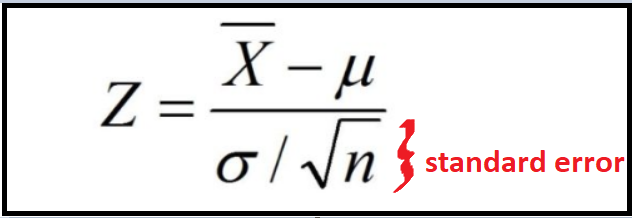

### t-value of samples distribution :

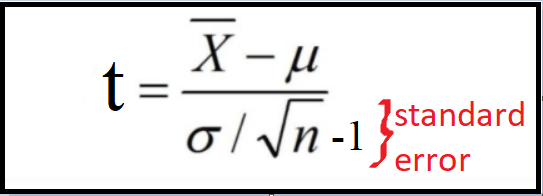

### One-sample t-test formula :

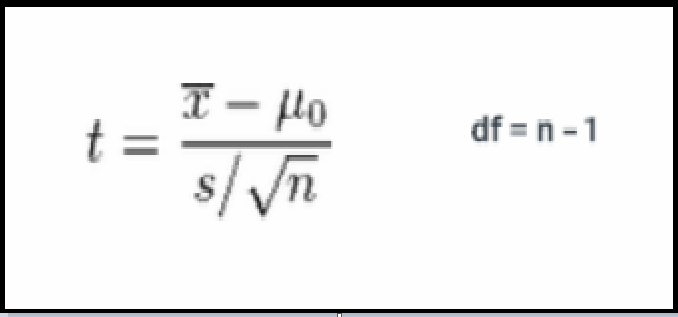

### t-test for the means of Paired (dependent) t-test formula :

x_D : The mean of calculated difference between the two observations on each pair. 
      iki sample'ın karşılıklı değerlerinin farklarından oluşan yeni kümenin mean'i
      
S_D : the standard deviation of this new set.
      bu yeni kümenin standart deviation'ı.

μ0  : mean of the population (0 --> in normal distribution) 
      popülasyonun mean'i 

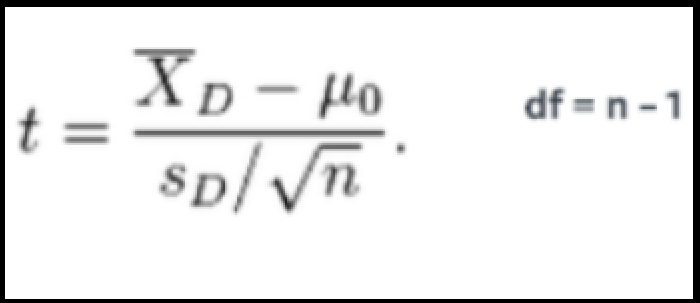

### t-test for the means of Independent Two-sample (dependent) formula:

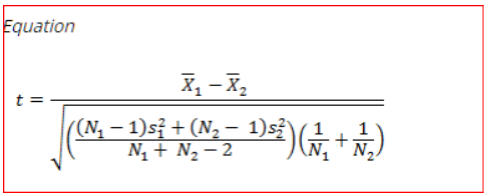

### ..or use this simplified form :

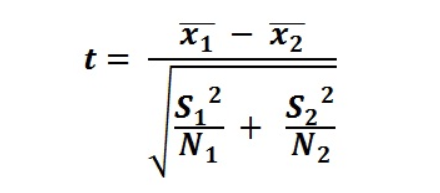

### degrees of freedom in two-sample t-test

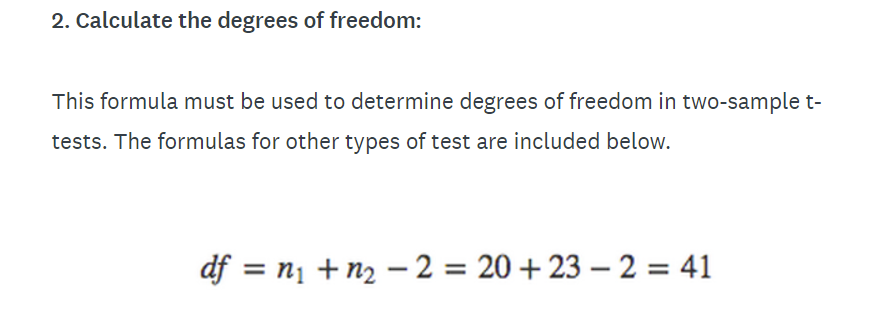

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

**EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean 13.20 (dollars)  and  standard  deviation  2.50 (dollars).  A company in this industry employs 40 workers, paying them an average of 12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)**

In [3]:
n = 40
sigma = 2.50
mu = 13.20
xbar = 12.20

**Testing Hypothesis Using z score**

In [15]:
# z_test = ( x ̅  - μ )  /  ( σ / √n ) 

z_test = (xbar - mu) / (sigma / np.sqrt(n))
z_test

# Zx = -2.5298221281347035 

-2.5298221281347035

In [16]:
# from z-table we found z score at the level of our alpha = 0.01 which is critical point 

Zα = -2.325

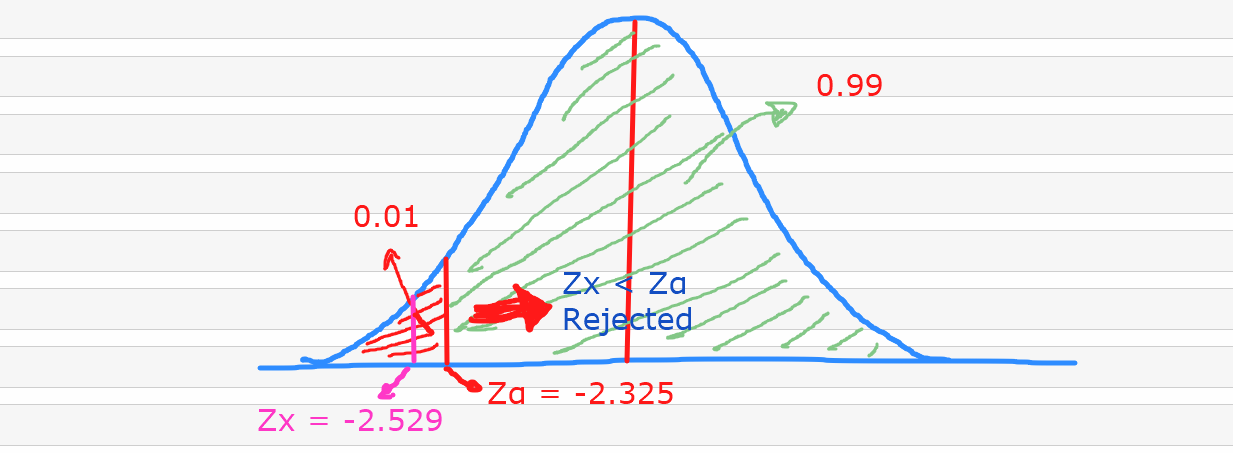

In [17]:
Zα = -2.325  # Zα : z_test

if z_test < Zα:
    print("Reject the Null")
else:
    print("Fail to reject Null")

Reject the Null


**Testing Hypothesis Using p value**

In [7]:
z_test = (xbar - mu) / (sigma / np.sqrt(n))
z_test

-2.5298221281347035

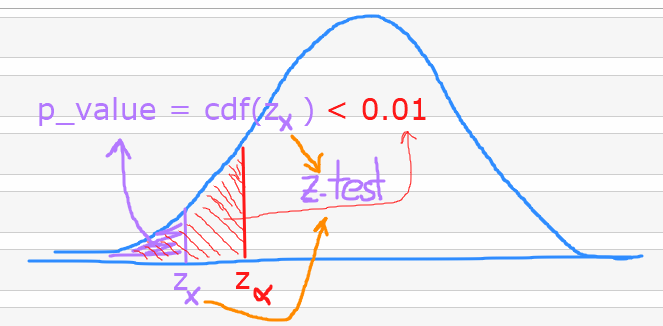

In [18]:
pvalue = stats.norm.cdf(z_test) # left side area
pvalue

# z_test's cdf gives the left-hand area as probability . We call this p_value. 

0.005706018193000826

In [19]:
# Comparing "p_value" with "α" value
 
alpha = 0.01   # (α = 1% --> 1-99%) it is given in the question

if pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


**EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?**


In [2]:
α = 0.01

**Hyphotesis**

**see two type of soils and calculate the means of them**


In [3]:

dfsoil = pd.read_csv("soil - Sheet1.csv", sep = ",")

In [4]:
dfsoil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [23]:
dfsoil.shape

# 35 rows and 2 columns

(35, 2)

In [ ]:
dfsoil["Soil1"].mean()

1.6918

In [ ]:
dfsoil["Soil2"].mean()

1.4171142857142858

**Calculate the T_test for the means of two independent samples of scores.**

**H0 : mu1 = mu2**
    
**H1 : mu1 != mu2**

In [12]:
stats.ttest_ind(dfsoil["Soil1"], dfsoil["Soil2"])

# I understand that my data has Nan values!

Ttest_indResult(statistic=nan, pvalue=nan)

In [ ]:
dfsoil.isnull().value_counts()

# 5 Null values in dfsoil dataframe!

Soil1  Soil2
False  False    30
True   False     5
dtype: int64

In [25]:
dfsoil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [ ]:
dfsoil.isnull()

# Soil1 column has "Null" values between rows no:30 - 34

,Soil1,Soil2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [5]:
# ttest_ind() function gives the statistics for the Independent Two-sample test (for the mean)

indTest = stats.ttest_ind(dfsoil["Soil1"], dfsoil["Soil2"], nan_policy='omit')

indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [6]:
# another way to ignore Null values finding ttest_ind :

indTest1 = stats.ttest_ind(dfsoil.dropna()["Soil1"], dfsoil.dropna()["Soil2"])

indTest1

# her iki sütun için de dataframe'e .dropna() uyguladık.

# dropna() özelliği gereği içinde Null değer olan satırları düşürdüğünden; hesaplamalarda hem Soil1 hem de Soil2 için n sayısı olarak 35-5 = 30 u kullanmıştır. 
# Dolayısıyla sonuçlarda bir miktar farklılık olması beklenmelidir.

Ttest_indResult(statistic=5.134893443609086, pvalue=3.4402046436336477e-06)

In [7]:
# with dropna() applied for only one column named "soil1" with "Nan"

# ikinci kez ttest_ind() fonksiyonunu uyguladık. bu sefer yalnızca Soil1 sütunu için dfsoil.dropna uyguladık.

indTest2 = stats.ttest_ind(dfsoil.dropna()["Soil1"], dfsoil["Soil2"])

indTest2

# dolayısıyla omit ile aynı sonucu return etti.

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [18]:
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [17]:
indTest.statistic

# t = 5.134893443609085

5.1681473319343345

In [19]:
indTest.pvalue

# p_value corresponding to "t" value  = 0.000000344020

2.5932287323528147e-06

In [20]:
# Comparing p value

alpha = 0.01      # alpha/2 = 0.005

if indTest.pvalue < alpha/2:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


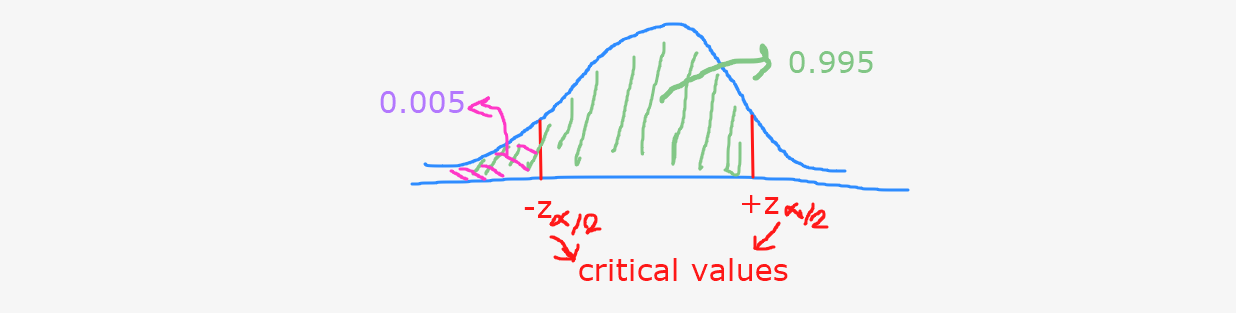

In [21]:
neg_t_005 = stats.t.ppf(0.005, 63)  # negative t-score of significant level for α = 0.01

neg_t_005

-2.6561450297622597

In [26]:
# Using t score for left tail which has a negative value

neg_t_005 = -2.6561450297622597

if indTest.statistic > abs(neg_t_005):    # without abs() function--> if  indTest.statistic < - neg_t_005
    print("Reject the Null")
else:
    print("Fail to reject Null")

Reject the Null


In [ ]:
pozt005 = stats.t.ppf(0.995, 63) # positive t-score of significant level for α = 0.01

pozt005

In [25]:
# Using t score for right tail which has a positive value


posz005 = 2.6561450297622597

if indTest.statistic > posz005:
    print("Reject the Null")
else:
    print("Fail to reject Null")

Reject the Null


**Solution With Formula**

**NOTE:** T-table does not carry all possible values for degrees of freedom (df) that you are looking for, you can take the closest degree of freedom. For example, if you need to use df--> n=51, try to use df-->n= 50 from T-table. 

In [ ]:
dfsoil.describe()

,Soil1,Soil2
count,30.000000,35.000000
mean,1.691800,1.417114
std,0.206903,0.219184
min,1.110000,1.053000
25%,1.572000,1.231000
50%,1.675000,1.379000
75%,1.865250,1.559000
max,2.054000,1.878000


Find the statistics:

In [28]:
s1 = dfsoil['Soil1'].std()
s1

0.2069028424331008

In [29]:
s2 = dfsoil['Soil2'].std()
s2

0.2191842860711146

In [30]:
mean1 = dfsoil['Soil1'].mean()
mean1

1.6918000000000002

In [31]:
mean2 = dfsoil['Soil2'].mean()
mean2

1.4171142857142855

In this question the statistics we have:

**n1** = 30

**x̅1** = 1.6918

**s1** = 0.20690284243310084

********

**n2** = 35

**x̅2** = 1.4171142857142858

**s2** = 0.2191842860711146

**Hypothesis**

**H0 : mu1 = mu2**

**H1 : mu1 != mu2**

In [6]:
n1 = 30

mean1 = 1.6918

s1 = 0.20690284243310084

n2 = 35

mean2 = 1.4171142857142858

s2 = 0.219184

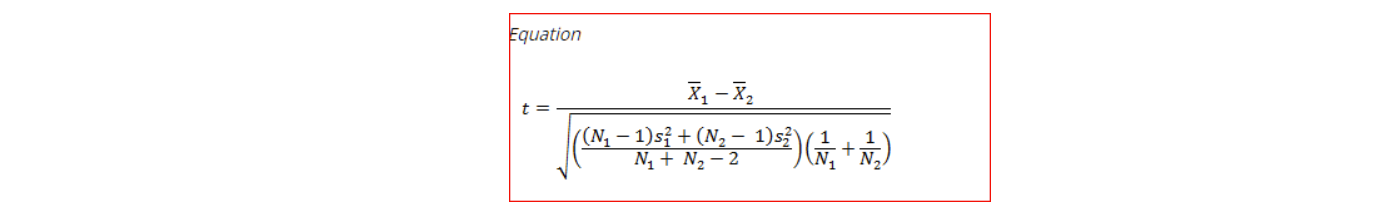

In [32]:
(1.691800 - 1.4171142857142858) / math.sqrt((((29*s1**2) + (34*s2**2)) / 65) * ((1/29)+(1/34)))

5.167155138919209

the simplified form of two independent samples formula:

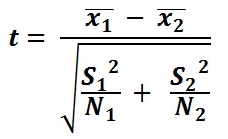

In [33]:
t = (mean1 - mean2) / math.sqrt((s1**2/30) + (s2**2/35))
t

5.191460504717394

In [34]:
squareds1 = dfsoil["Soil1"].std()**2

squareds2 = dfsoil["Soil2"].std()**2

In [35]:
t = (1.691800 - 1.4171142857142858) / math.sqrt((squareds1/30) + (squareds2/35))
t

5.191460504717386

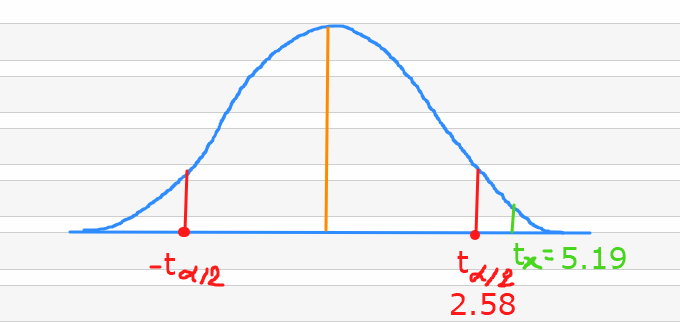

In [36]:
# comparing t-value with critical value

critical_value = 2.575

if t > critical_value:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


**EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset**



*   **(i) Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).**

*   **(ii) Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.**


**CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345**

### SOLUTION

*   **(i) Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).**

In [60]:
# PISA Test Dataset

dfpisa = pd.read_csv("2015 PISA Test - Sheet1.csv", sep = ",")

dfpisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [22]:
dfpisa.sample(20)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
10,CHL,SA,64.289000,422.6714,458.5709,446.9561
63,THA,AS,39.316127,415.4638,409.1301,421.3373
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
13,CRI,NaN,59.762950,400.2534,427.4875,419.6080
34,ITA,EU,58.141735,489.7287,484.7580,480.5468
35,JOR,AS,60.114383,380.2590,408.1022,408.6691
22,FIN,EU,86.422133,511.0769,526.4247,530.6612
62,SWE,EU,90.610200,493.9181,500.1556,493.4224
49,MYS,AS,71.064068,446.1098,430.5782,442.9475
44,MDA,EU,63.306625,419.6635,416.2293,427.9978


In [61]:
dfpisa[dfpisa['Continent_Code'].isnull()==True]

# Continent_Code has NaN values and all of them in North America!

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
8,CAN,NaN,88.470000,515.6474,526.6678,527.7047
13,CRI,NaN,59.762950,400.2534,427.4875,419.6080
18,DOM,NaN,54.215766,327.7020,357.7377,331.6388
45,MEX,NaN,57.431043,408.0235,423.2765,415.7099
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [62]:
dfpisa['Continent_Code'].fillna(value='NA', inplace = True)

# change NaN values to NA (North America)

In [85]:
dfpisa[dfpisa['Continent_Code']=='NA'].head(10)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
8,CAN,NA,88.470000,515.6474,526.6678,527.7047
13,CRI,NA,59.762950,400.2534,427.4875,419.6080
18,DOM,NA,54.215766,327.7020,357.7377,331.6388
45,MEX,NA,57.431043,408.0235,423.2765,415.7099
68,USA,NA,74.554202,469.6285,496.9351,496.2424


In [64]:
dfpisa.shape

(70, 6)

In [53]:
dfpisa.describe()  # for all continents

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [65]:
# see the unique values 

dfpisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', 'NA', 'AF'], dtype=object)

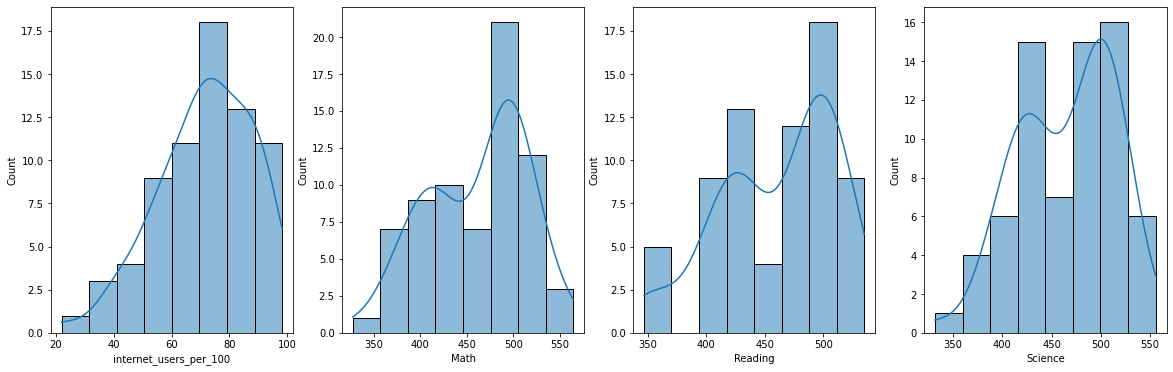

In [55]:
# First of all let's see how distribute the PISA scores for all over the world.

fig, axes = plt.subplots(1,4, figsize=(20,6))

sns.histplot(dfpisa['internet_users_per_100'], kde=True, ax=axes[0])
sns.histplot(dfpisa['Math'], kde=True, ax=axes[1])
sns.histplot(dfpisa['Reading'], kde=True, ax=axes[2])
sns.histplot(dfpisa['Science'], kde=True, ax=axes[3]);

## Analysis for EU

In [70]:
dfEU = dfpisa[dfpisa["Continent_Code"]=="EU"]
dfEU.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720
9,CHE,EU,87.479056,521.2506,492.1982,505.5058


In [67]:
dfpisa[dfpisa["Continent_Code"]=="EU"].describe()


,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [71]:
dfEU.shape

# my data has values of 37 countries 

(37, 6)

In [72]:
dfEU.var()

internet_users_per_100     154.399841
Math                      1235.550805
Reading                   1422.839540
Science                   1186.844969
dtype: float64

In [74]:
# to confirm if math std came from describe is true.

np.sqrt(1235.550805)

35.15040262927297

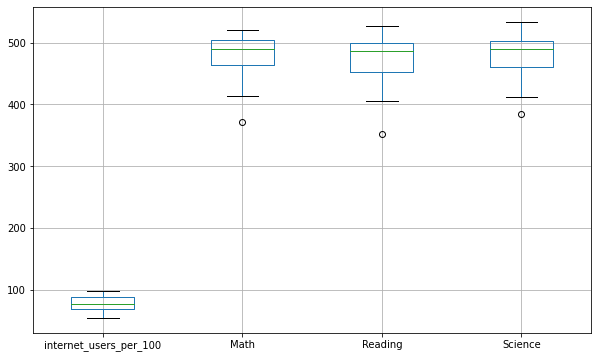

In [75]:
dfEU.boxplot(figsize=(10,6));

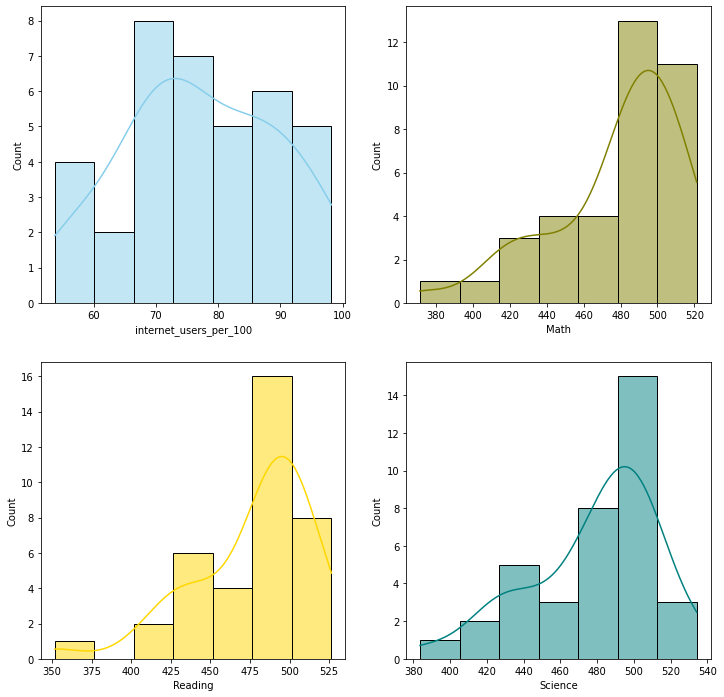

In [76]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=dfEU, x="internet_users_per_100", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dfEU, x="Math", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dfEU, x="Reading", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dfEU, x="Science", kde=True, color="teal", ax=axs[1, 1]);

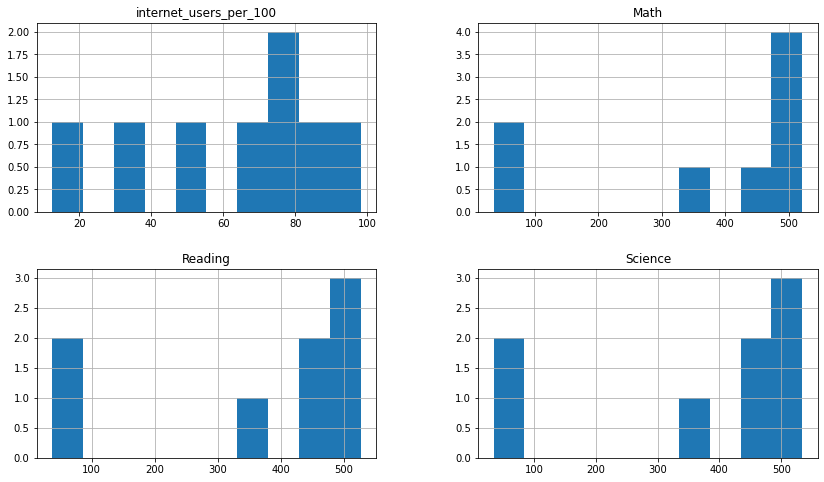

In [91]:
dfEU.hist(figsize=[14,8]);

## Analysis for AS

In [77]:
dfAS = dfpisa[dfpisa["Continent_Code"]=="AS"]
dfAS

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
25,GEO,AS,47.569760,403.8332,401.2881,411.1315
27,HKG,AS,84.948353,547.9310,526.6753,523.2774
30,IDN,AS,21.976068,386.1096,397.2595,403.0997
33,ISR,AS,77.352090,469.6695,478.9606,466.5528
35,JOR,AS,60.114383,380.2590,408.1022,408.6691
36,JPN,AS,91.058028,532.4399,515.9585,538.3948
37,KAZ,AS,72.900000,459.8160,427.1410,456.4836
38,KOR,AS,89.648631,524.1062,517.4367,515.8099


In [78]:
dfAS.shape

(17, 6)

In [79]:
dfAS.describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [86]:
dfAS.var()

internet_users_per_100     444.621918
Math                      4141.757822
Reading                   3254.584049
Science                   3211.644321
dtype: float64

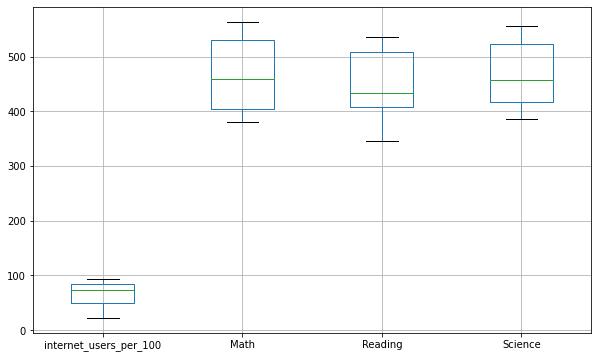

In [87]:
dfAS.boxplot(figsize=(10, 6));

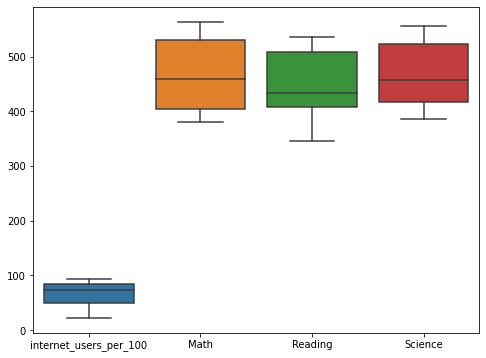

In [88]:
fig = plt.subplots(figsize=(8, 6))

sns.boxplot(data=dfAS);

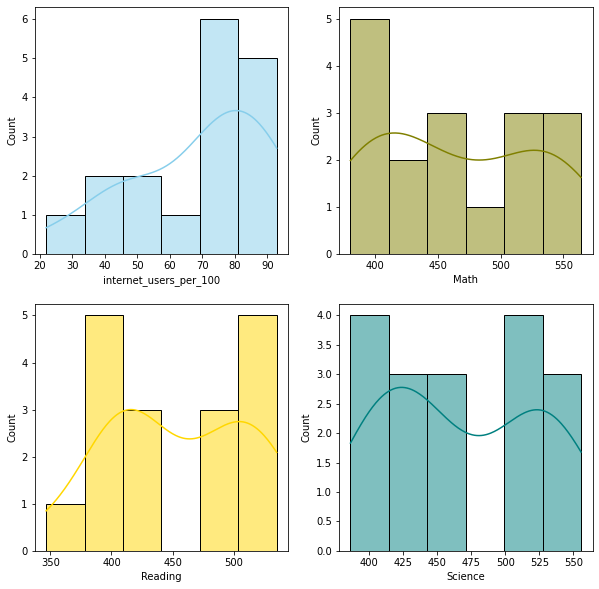

In [89]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=dfAS, x="internet_users_per_100", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dfAS, x="Math", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dfAS, x="Reading", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dfAS, x="Science", kde=True, color="teal", ax=axs[1, 1]);

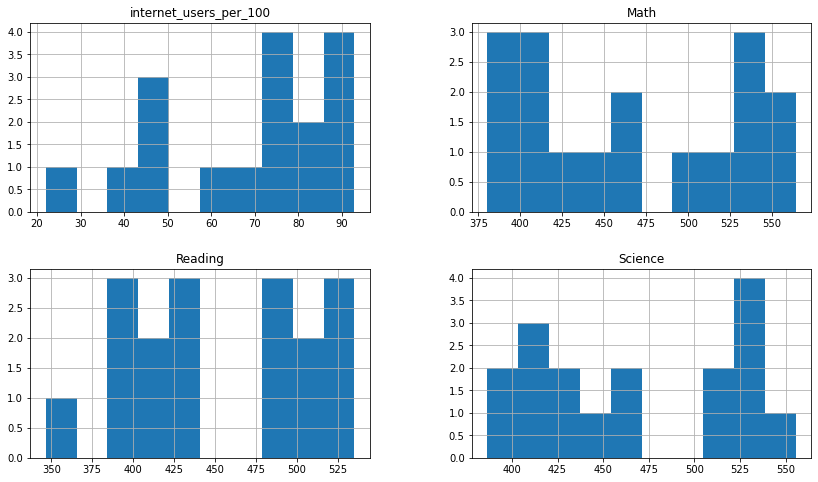

In [90]:
dfAS.hist(figsize=[14,8]);

In [93]:
dfpisa[dfpisa["Continent_Code"]=="AS"].describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


## Analysis for SA

In [91]:
dfSA = dfpisa[dfpisa["Continent_Code"]=="SA"]
dfSA

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
7,BRA,SA,58.327952,377.0695,407.3486,400.6821
10,CHL,SA,64.289000,422.6714,458.5709,446.9561
12,COL,SA,55.904973,389.6438,424.9052,415.7288
53,PER,SA,40.900000,386.5606,397.5414,396.6836
64,TTO,SA,69.198471,417.2434,427.2733,424.5905
67,URY,SA,64.600000,417.9919,436.5721,435.3630


In [92]:
dfSA.shape

(7, 6)

In [93]:
dfSA.describe()

,internet_users_per_100,Math,Reading,Science
count,7.000000,7.000000,7.000000,7.000000
mean,60.180494,402.887700,425.359229,421.747186
std,9.772455,18.128894,19.709688,18.470319
min,40.900000,377.069500,397.541400,396.683600
25%,57.116462,388.102200,416.126900,408.205450
50%,64.289000,409.033300,425.303100,424.590500
75%,66.321532,417.617650,431.922700,433.794600
max,69.198471,422.671400,458.570900,446.956100


In [94]:
dfSA.var()

internet_users_per_100     95.500869
Math                      328.656783
Reading                   388.471816
Science                   341.152678
dtype: float64

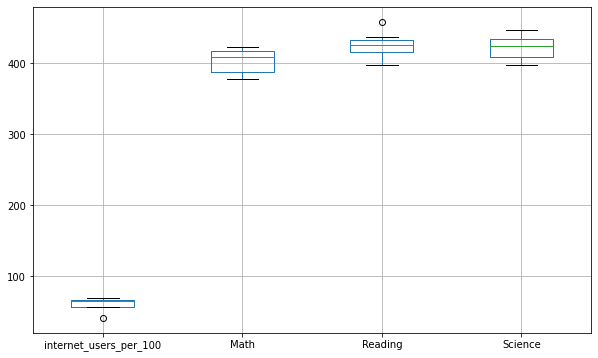

In [95]:
dfSA.boxplot(figsize=(10, 6));

# since the scales of internet_user_per_100 is differ from the other values, the boxplot doesn't give us clear view.

# for analitically more readibility we need to plot them seperately. (we used that way for SA continent below)

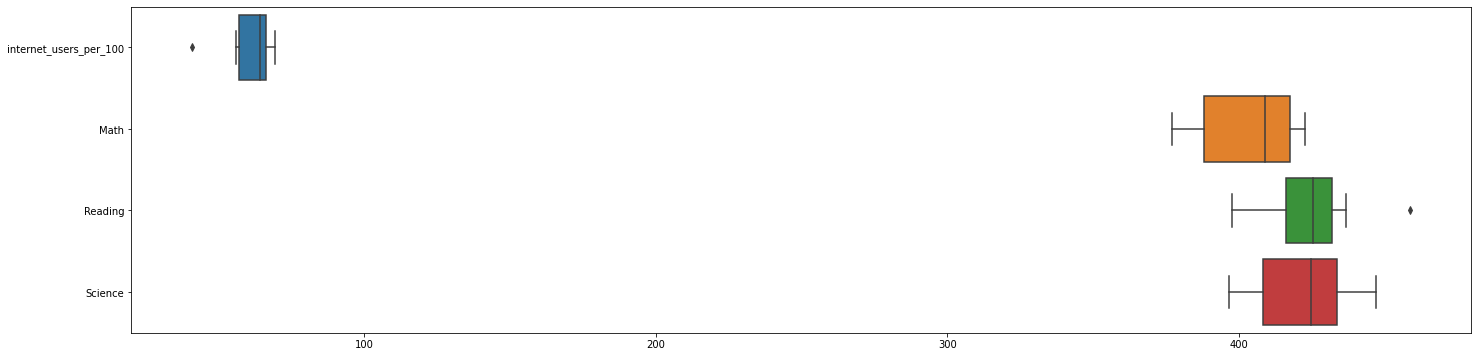

In [96]:
fig = plt.subplots(figsize= (24,6))

sns.boxplot(data=dfSA, orient="h");

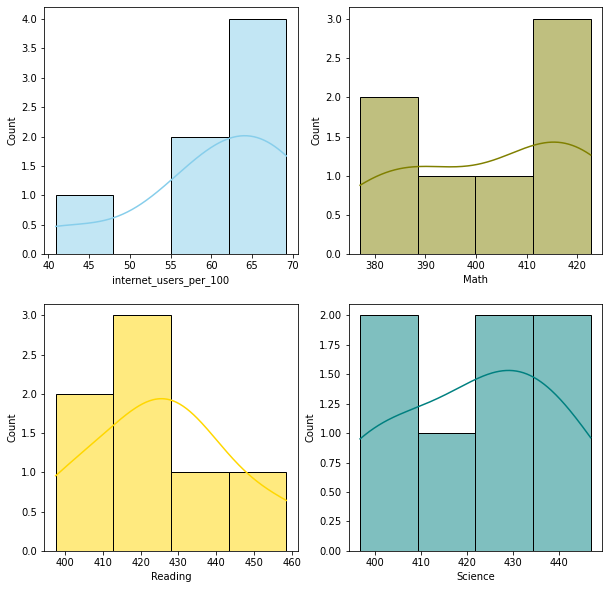

In [97]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=dfSA, x="internet_users_per_100", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dfSA, x="Math", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dfSA, x="Reading", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dfSA, x="Science", kde=True, color="teal", ax=axs[1, 1]);

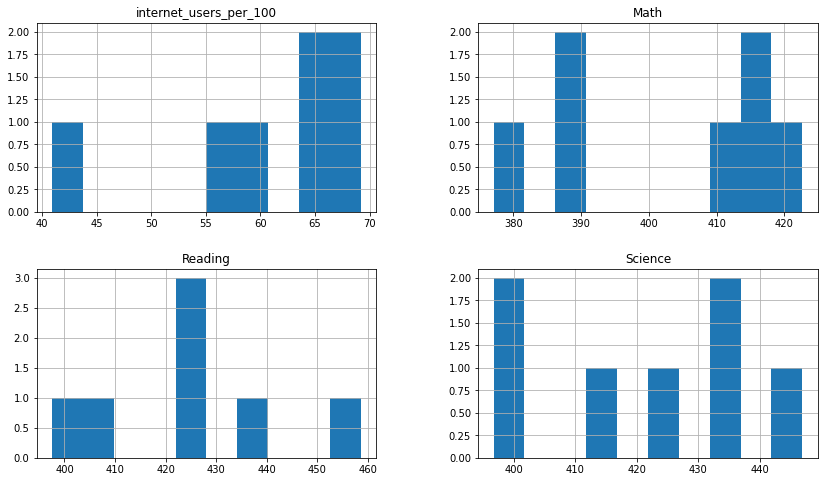

In [98]:
dfSA.hist(figsize=[14,8]);

## Analysis for OC

In [100]:
dfOC = dfpisa[dfpisa["Continent_Code"]=="OC"]
dfOC

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
52,NZL,OC,88.222889,495.2233,509.2707,513.3035


In [101]:
dfOC.shape

(2, 6)

In [102]:
dfOC.describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,86.391704,494.559750,506.085650,511.648700
std,2.589686,0.938401,4.504341,2.340241
min,84.560519,493.896200,502.900600,509.993900
25%,85.476112,494.227975,504.493125,510.821300
50%,86.391704,494.559750,506.085650,511.648700
75%,87.307296,494.891525,507.678175,512.476100
max,88.222889,495.223300,509.270700,513.303500


In [103]:
dfOC.var()

internet_users_per_100     6.706475
Math                       0.880597
Reading                   20.289087
Science                    5.476726
dtype: float64

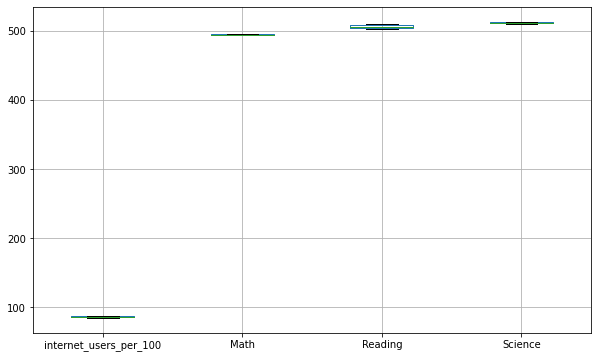

In [104]:
dfOC.boxplot(figsize=(10, 6));

In [105]:
dfOC3columns = dfSA[["Math", "Reading", "Science"]]
dfOC3columns

,Math,Reading,Science
2,409.0333,425.3031,432.2262
7,377.0695,407.3486,400.6821
10,422.6714,458.5709,446.9561
12,389.6438,424.9052,415.7288
53,386.5606,397.5414,396.6836
64,417.2434,427.2733,424.5905
67,417.9919,436.5721,435.3630


In [106]:
dfOCinternet = dfOC[["internet_users_per_100"]]
dfOCinternet

,internet_users_per_100
3,84.560519
52,88.222889


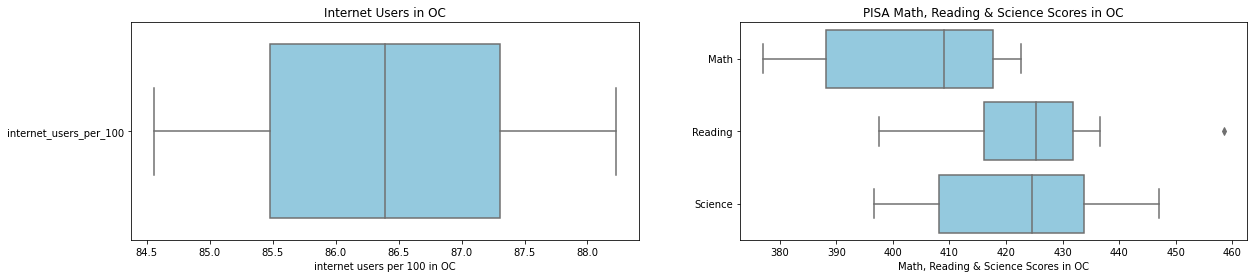

In [107]:
fig, axes = plt.subplots(1,2, figsize=(20,4))

sns.boxplot(data=dfOCinternet, orient='h', ax=axes[0], color="skyblue").set(title='Internet Users in OC')
sns.boxplot(data=dfOC3columns, orient='h', ax=axes[1], color="skyblue").set(title='PISA Math, Reading & Science Scores in OC')

axes[0].set(xlabel='internet users per 100 in OC')
axes[1].set(xlabel='Math, Reading & Science Scores in OC');

# the plot is more readable now!

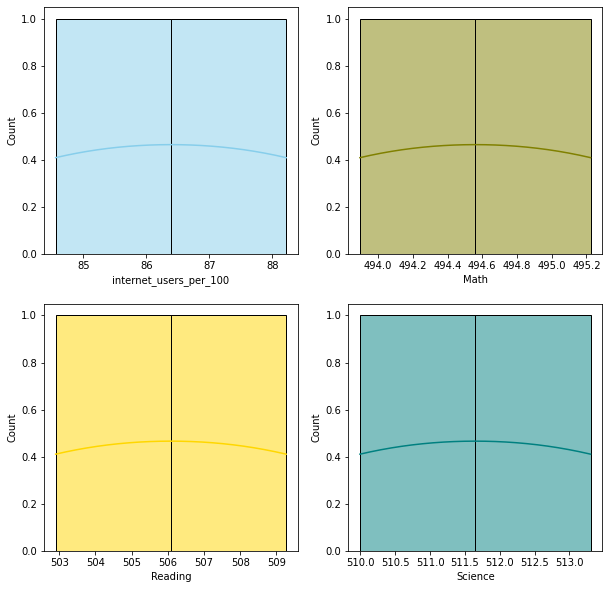

In [108]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=dfOC, x="internet_users_per_100", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dfOC, x="Math", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dfOC, x="Reading", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dfOC, x="Science", kde=True, color="teal", ax=axs[1, 1]);

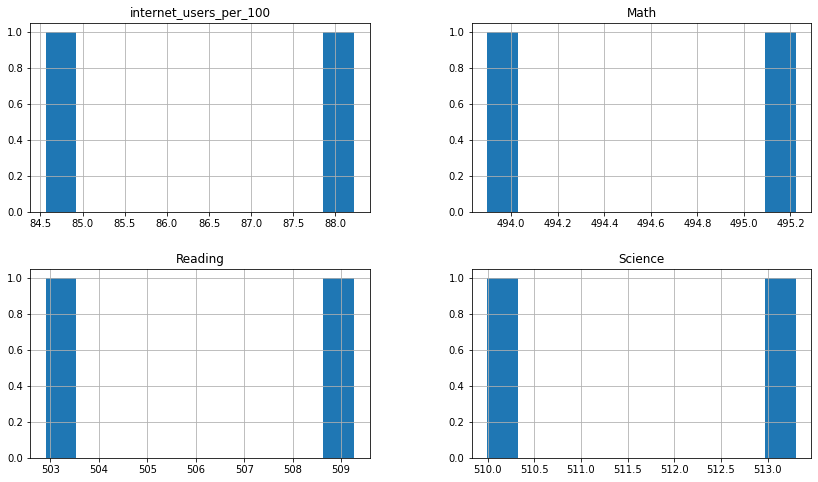

In [109]:
dfOC.hist(figsize=[14,8]);

## Analysis for AF

In [110]:
dfAF = dfpisa[dfpisa["Continent_Code"]=="AF"]
dfAF

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
19,DZA,AF,38.200000,359.6062,349.8593,375.7451
65,TUN,AF,48.519836,366.8180,361.0555,386.4034


In [111]:
dfAF.describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,43.359918,363.212100,355.457400,381.074250
std,7.297226,5.099513,7.916909,7.536556
min,38.200000,359.606200,349.859300,375.745100
25%,40.779959,361.409150,352.658350,378.409675
50%,43.359918,363.212100,355.457400,381.074250
75%,45.939877,365.015050,358.256450,383.738825
max,48.519836,366.818000,361.055500,386.403400


In [112]:
dfAF.shape

(2, 6)

In [113]:
dfAF.var()

internet_users_per_100    53.249507
Math                      26.005030
Reading                   62.677447
Science                   56.799679
dtype: float64

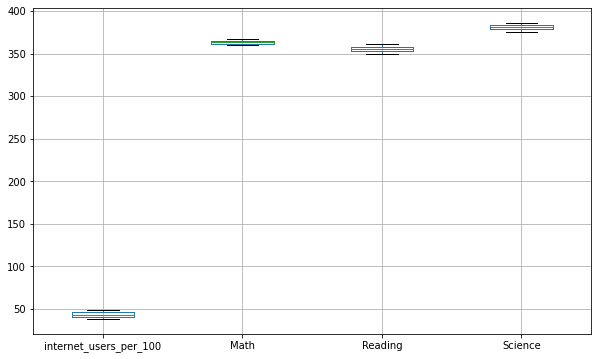

In [114]:
dfAF.boxplot(figsize=(10, 6));

In [115]:
dfAF3columns = dfAF[["Math", "Reading", "Science"]]
dfAF3columns

,Math,Reading,Science
19,359.6062,349.8593,375.7451
65,366.8180,361.0555,386.4034


In [116]:
dfAFinternet = dfAF[["internet_users_per_100"]]
dfAFinternet

,internet_users_per_100
19,38.200000
65,48.519836


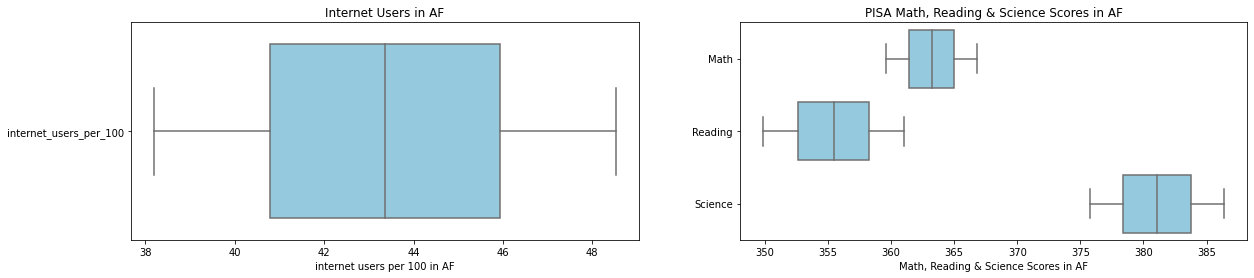

In [117]:
fig, axes = plt.subplots(1,2, figsize=(20,4))

sns.boxplot(data=dfAFinternet, orient='h', ax=axes[0], color="skyblue").set(title='Internet Users in AF')
sns.boxplot(data=dfAF3columns, orient='h', ax=axes[1], color="skyblue").set(title='PISA Math, Reading & Science Scores in AF')

axes[0].set(xlabel='internet users per 100 in AF')
axes[1].set(xlabel='Math, Reading & Science Scores in AF');

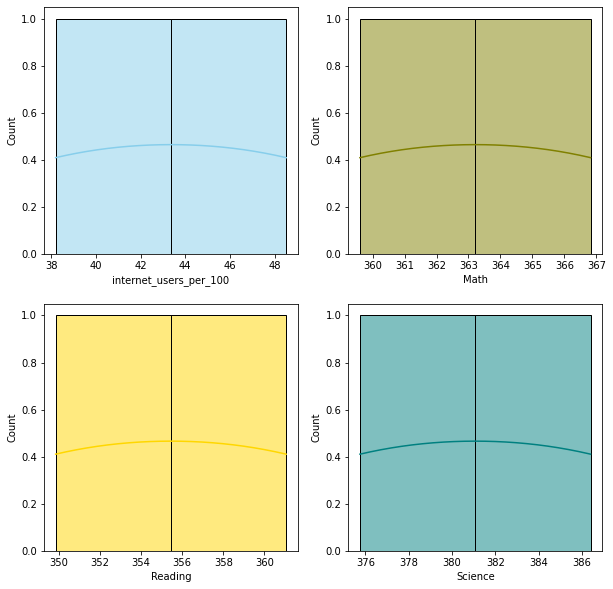

In [118]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=dfAF, x="internet_users_per_100", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dfAF, x="Math", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dfAF, x="Reading", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dfAF, x="Science", kde=True, color="teal", ax=axs[1, 1]);

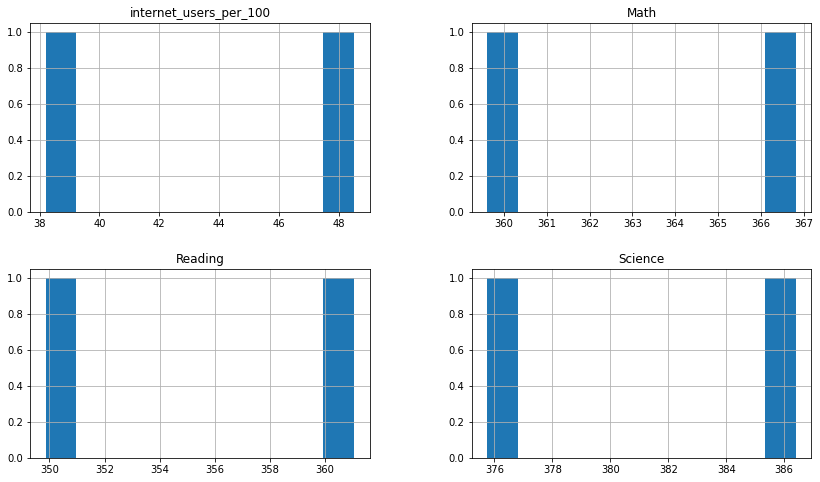

In [119]:
dfAF.hist(figsize=[14,8]);

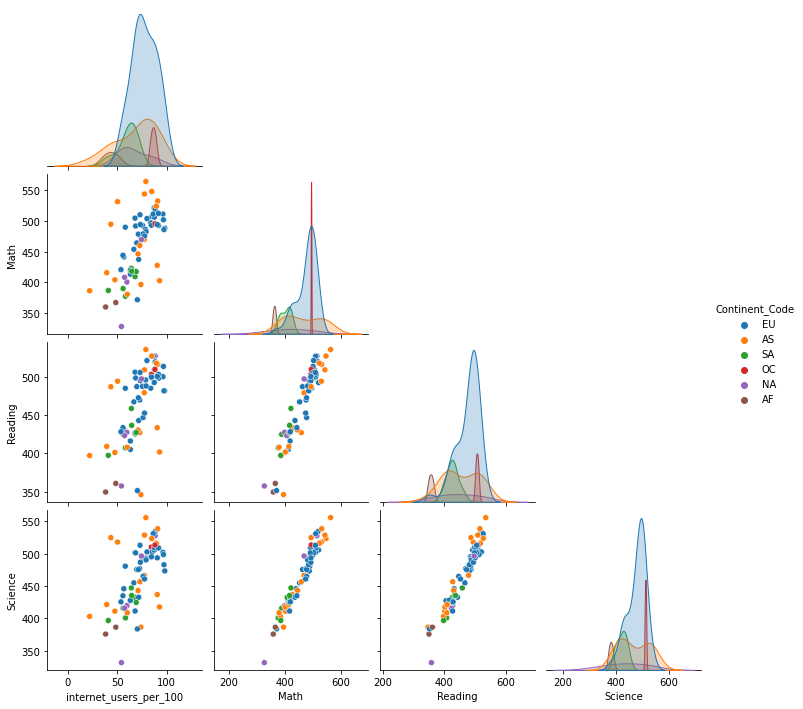

In [122]:
sns.pairplot(dfpisa, hue = 'Continent_Code', corner = True);

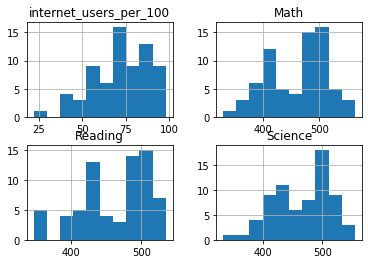

In [123]:
dfpisa.hist();

**SOLUTION: (ii)**

**(ii) Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.**

In [ ]:
The null hypothesis that the population means of the two groups are not significantly different (H0: μA = μB)

The alternative hypothesis is (H0: μA ≠ μB)

In [124]:
# With using nan_policy='omit'. 
# In this study we will use this t value found by nan_policy='omit'.

statistic, pvalue = stats.ttest_ind(dfEU.Math, dfAS.Math, nan_policy='omit')  # independet T test

statistic, pvalue

(0.870055317967983, 0.38826888111307345)

In [126]:
EU = dfpisa[dfpisa['Continent_Code']=='EU'].Math
AS = dfpisa[dfpisa['Continent_Code']=='AS'].Math
Mathstatistic, Mathpvalue = stats.ttest_ind(EU, AS, nan_policy='omit')   # independent T test

Mathstatistic, Mathpvalue 

## CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345


(0.870055317967983, 0.38826888111307345)

Our test statistic is **0.870055317967983** and the corresponding two-sided p-value is **0.38826888111307345**.

From standard normal table, the two-tailed critical value at 0.05% level of significance is **tα/2** = 0.05/2 = 0.025 = **1.965** which is our critical value for t-value comparison.

If the calculated p-value (0.38826888111307345) is less than the critical alpha value (α/2 = 0.025), then we reject the null hypothesis (and conclude that the means are significantly different) OR vice verse.

(Since our calculated p-value is NOT less than the critical alpha value, the result is Fail to Reject)

In [127]:
critical_pvalue = 0.025

if Mathpvalue < critical_pvalue:
    print("Reject the Null")
else:
    print("Fail to reject")

Fail to reject


**FAIL TO REJECT**

In [128]:
dfEU.Math.describe()

count     37.000000
mean     477.981449
std       35.150403
min      371.311400
25%      464.040100
50%      489.728700
75%      503.722000
max      521.250600
Name: Math, dtype: float64

In [129]:
dfAS.Math.describe()

count     17.000000
mean     466.216647
std       64.356490
min      380.259000
25%      403.833200
50%      459.816000
75%      531.296100
max      564.189700
Name: Math, dtype: float64

In [130]:
mathmeandiff = (dfEU.Math.mean()) - (dfAS.Math.mean())

mathmeandiff

11.764801589825197

**DECISION AND CONCLUSIONS**

Since calculated p value 0.38826888111307345 is greater than our chosen (critical) significance level of left and right tail α/2 = 0.025, we can **fail to reject the null hypothesis**, and have statistically NO SUFFICIENT EVIDENCE to conclude that the Math scores in EU and AS are significantly different from each other.

Based on the results, we can state the following:

There was NOT a significant difference in the average Math scores in EU and AS 
(t70 = 0.870055317967983, p < .05)

On average, Math scores in EU with 11.764801589825083 are slightly higher than the ones in AS; however, showing NO statistically difference among them.

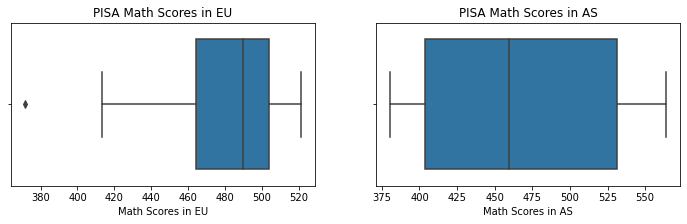

In [134]:
fig, axes = plt.subplots(1,2, figsize=(12,3))

sns.boxplot(dfEU['Math'], ax=axes[0]).set(title='PISA Math Scores in EU')
sns.boxplot(dfAS['Math'], ax=axes[1]).set(title='PISA Math Scores in AS')

axes[0].set(xlabel='Math Scores in EU')
axes[1].set(xlabel='Math Scores in AS');

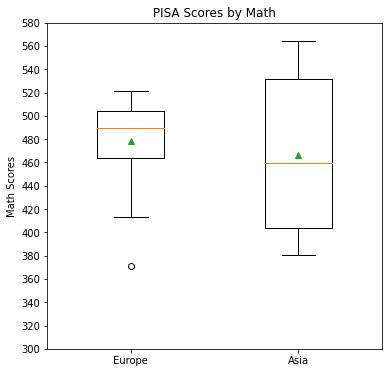

In [135]:
plt.figure(figsize=(6,6))
plt.boxplot([dfEU['Math'],dfAS['Math']], showmeans=True, widths = 0.4)

plt.title('PISA Scores by Math')
plt.ylabel('Math Scores')
plt.xticks([1, 2], ['Europe', 'Asia'])
y_ticks = np.arange(300, 600, 20)
plt.yticks(y_ticks);

# we see that the distribution of Europe is left skewed and the distribution of Asia is right skewed# we see that the distribution of Europe is right skewed and the distribution of Asia is left skewed

**EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.**

**CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128**

**PAIRED SAMPLE T-TEST ASSUMPTIONS**

In order for the paired sample t-test results to be trusted, the following assumptions need to be met:

The dependent variable (DV) must be continuous which is measured on an interval or ratio scale
The observations are independent

The DV should be approximately normally distributed

The paired sample t-test is robust to this violation. If there is a violation of normality, as long as it’s not in a major violation the test results can be considered valid

The DV should not contain any significant outliers
If any of these assumptions are violated, a different test should be used. An alternative to the paired sample t-test is the Wilcoxon signed-rank Test.

In [138]:
# Placement Test Scores

dfscores = pd.read_csv("students_2014.csv", sep = ",", na_values = ".", index_col = 0)

In [141]:
dfscores.sample(10)

,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
ids,,,,,,,,,,,,,,,,,,,,,
41870,4/11/1994,5-Aug-2013,13-May-2019,2.0,I am currently exploring options,1.0,0,55.00,101.71,0.0,...,86.23,89.19,61.20,88.91,Out of state,NaN,3.0,24.0,9.0,3.0
37333,6/7/1993,6-Aug-2012,14-May-2018,3.0,political science,1.0,0,64.65,150.23,0.0,...,89.12,NaN,69.90,86.33,In state,0.0,3.0,30.0,4.0,15.0
20903,12/25/1993,5-Aug-2013,13-May-2019,2.0,NaN,0.0,1,65.99,141.53,0.0,...,89.95,83.61,61.04,78.86,In state,0.0,3.0,23.0,NaN,4.0
38365,5/27/1994,4-Aug-2014,11-May-2020,1.0,philosophy,0.0,1,66.41,175.20,0.0,...,77.09,79.08,60.93,76.27,Out of state,1.0,NaN,NaN,10.0,5.0
40390,4/30/1994,NaN,NaN,NaN,Africana studies,1.0,1,68.84,154.70,0.0,...,75.65,76.54,51.14,75.94,In state,0.0,3.0,26.0,NaN,3.0
32304,8/7/1994,4-Aug-2014,11-May-2020,1.0,Aerospace engineering,1.0,1,67.24,157.19,0.0,...,82.77,73.27,55.81,79.15,In state,1.0,NaN,NaN,NaN,2.0
28328,9/26/1989,1-Aug-2011,08-May-2017,4.0,Elementary ed,0.0,0,63.07,191.58,0.0,...,NaN,89.00,72.63,77.47,In state,0.0,3.0,15.0,2.0,3.0
43692,3/22/1991,4-Aug-2014,11-May-2020,1.0,biometrics,1.0,0,57.82,170.81,0.0,...,85.53,89.67,78.05,NaN,In state,1.0,NaN,NaN,8.0,7.0
23340,11/26/1989,1-Aug-2011,08-May-2017,4.0,AstronomyÂ,1.0,1,64.46,134.77,0.0,...,75.05,88.79,85.69,83.22,NaN,0.0,3.0,19.0,4.0,8.0


In [142]:
dfscores.shape

(435, 22)

In [143]:
dfscores[["English", "Math"]].isnull().value_counts()

# English has 24+2 = 26 Null values and Math has 11+2 =13 Null values

English  Math 
False    False    398
True     False     24
False    True      11
True     True       2
dtype: int64

In [145]:
# Drop NaN data 

dfscoresdrop = dfscores[["English", "Math"]].dropna()  # Note that NaN values are dropped in both columns 

In [146]:
dfscoresdrop.isnull().value_counts()

English  Math 
False    False    398
dtype: int64

In [147]:
# With Nan values "dfscores" dataset has 435 rows.

dfscores[["English", "Math"]]

,English,Math
ids,,
43783,88.24,60.02
20278,89.45,70.19
20389,96.73,71.20
22820,74.06,55.89
24559,82.61,65.52
...,...,...
34021,87.72,65.31
40697,91.01,70.25
34272,81.05,58.16


In [148]:
# Without Nan values "dfscores" dataset has 398 rows.

dfscoresdrop

,English,Math
ids,,
43783,88.24,60.02
20278,89.45,70.19
20389,96.73,71.20
22820,74.06,55.89
24559,82.61,65.52
...,...,...
34021,87.72,65.31
40697,91.01,70.25
34272,81.05,58.16


In the sample dataset, each student's responses are recorded on one row. Their English and Math scores are represented in the variables English and Math. This format is already appropriate for the paired samples t-test, so no further restructuring is needed.

In [149]:
dfscores[["English", "Math"]].describe()

,English,Math
count,409.000000,422.000000
mean,82.787555,65.468009
std,6.839803,8.375930
min,59.830000,35.320000
25%,78.330000,60.202500
50%,83.150000,65.445000
75%,87.170000,70.567500
max,101.950000,93.780000


In [150]:
dfscores['English'].std()

6.839803158182041

In [151]:
dfscores['English'].var()

46.78290724267702

In [152]:
dfscores['Math'].std()

8.375929562049427

In [153]:
dfscores['Math'].var()

70.1561960284135

In [154]:
Englishmean =dfscores['English'].mean()
Englishmean

82.78755501222494

In [155]:
Mathmean = dfscores['Math'].mean()
Mathmean

65.46800947867298

In [156]:
Xmeandiff = Englishmean - Mathmean
Xmeandiff

17.31954553355196

The hypotheses for this example can be expressed as:

**H0:** µEnglish - µMath = 0 ("the difference between the average English and Math scores is equal to 0")

**H1:** µEnglish - µMath ≠ 0 ("the difference between the average English and Math scores is not 0")

Before we perform our hypothesis tests, we should decide on a significance level (denoted α). The significance level is the threshold we will use to decide whether a test result is significant. For this example, let's use α = 0.05, or 5%.

In [157]:
#With using dropna()

stats.ttest_ind(dfscores.dropna()["English"], dfscores.dropna()["Math"])

Ttest_indResult(statistic=10.787205641803522, pvalue=1.1746036768217507e-18)

In [158]:
# With using nan_policy='omit'. In this study we will use this t value found by nan_policy='omit'.

paired = stats.ttest_rel(dfscores["English"], dfscores["Math"], nan_policy='omit')
paired

Ttest_relResult(statistic=36.31256898171986, pvalue=3.071098719220689e-128)

**CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128**

In [160]:
tscores = paired.statistic
tscores

36.31256898171986

In [161]:
pvaluescores = paired.pvalue
pvaluescores

3.071098719220689e-128

Our test statistic is **36.31256898171986** and the corresponding two-sided p-value is **3.071098719220689e-128**.

From standard normal table, the two-tailed critical value at 0.05% level of significance is Zα/2 = 0.05/2 = 0.025 = **1.965** which is our critical value for t-value comparison.

If the calculated p value (3.071098719220689e-128) is less than the critical alpha value (α/2 = 0.025), then we reject the null hypothesis (and conclude that the means are significantly different).

In [164]:
# compare using p-value 

critical_pvalue = 0.025

if pvaluescores < critical_pvalue:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


In [165]:
# compare using t-score

critical_tscore = 1.965

if tscores > critical_tscore:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


**DECISION AND CONCLUSIONS** 

Since p < 3.071098719220689e-128 is less than our chosen significance level of left and right tail α/2 = 0.025, we can reject the null hypothesis, and have statistically sufficient evidence to conclude that the English and Math scores were significantly different from each other.

Based on the results, we can state the following:

There was a significant difference in the average English and Math scores (t435 = 36.31256898171986, p < 0.05).

On average, students scored 17.31954553355196 points higher on the English test than the Math test.

**Solution With Formula:**

The test statistic of a paired t-test is calculated as : 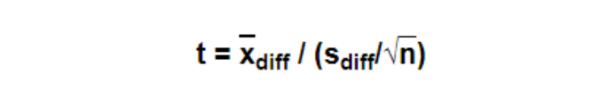
**where :**
**Xdiff :** sample mean of the differences

**Sdiff :** sample standard deviation of the differences

**n     :** sample size (i.e. number of pairs)

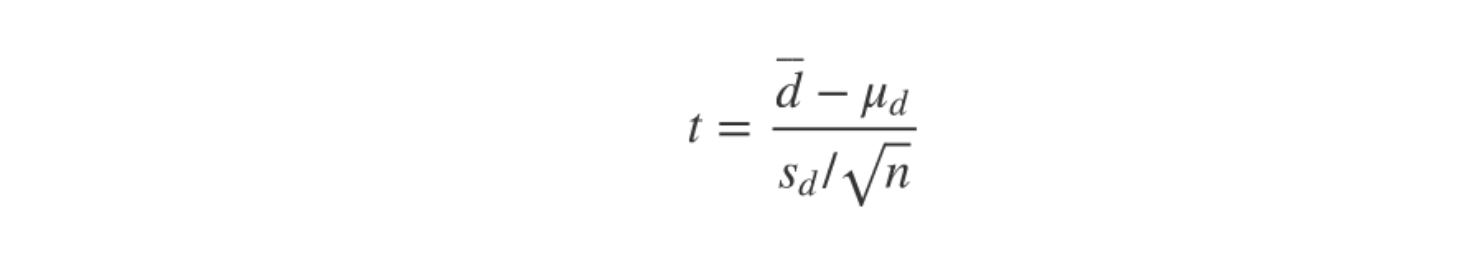

In [166]:
dfscores[["English", "Math"]].describe()

,English,Math
count,409.000000,422.000000
mean,82.787555,65.468009
std,6.839803,8.375930
min,59.830000,35.320000
25%,78.330000,60.202500
50%,83.150000,65.445000
75%,87.170000,70.567500
max,101.950000,93.780000


FIRST; Calculation of sample mean of the differences

In [167]:
Englishmean =dfscores['English'].mean()
Englishmean

82.78755501222494

In [168]:
Mathmean = dfscores['Math'].mean()
Mathmean

65.46800947867298

In [169]:
meandiff = Englishmean - Mathmean
meandiff

17.31954553355196

SECOND, calculation of sample standard deviation of the differences

In [170]:
Engstd = dfscores['English'].std()
Engstd

6.839803158182041

In [171]:
Mathstd = dfscores['Math'].std()
Mathstd

8.375929562049427

In [172]:
Mathstd - Engstd

1.536126403867386

In [173]:
dfeng_math = dfscores[["English", "Math"]]
dfeng_math

,English,Math
ids,,
43783,88.24,60.02
20278,89.45,70.19
20389,96.73,71.20
22820,74.06,55.89
24559,82.61,65.52
...,...,...
34021,87.72,65.31
40697,91.01,70.25
34272,81.05,58.16


In [175]:
dfeng_math['English - Math'] = dfeng_math['English'] - dfeng_math['Math']

In [176]:
dfeng_math.dropna(inplace = True)

In [177]:
dfeng_math.head()

,English,Math,English - Math
ids,,,
43783,88.24,60.02,28.22
20278,89.45,70.19,19.26
20389,96.73,71.20,25.53
22820,74.06,55.89,18.17
24559,82.61,65.52,17.09


In [178]:
dfeng_math.shape

(398, 3)

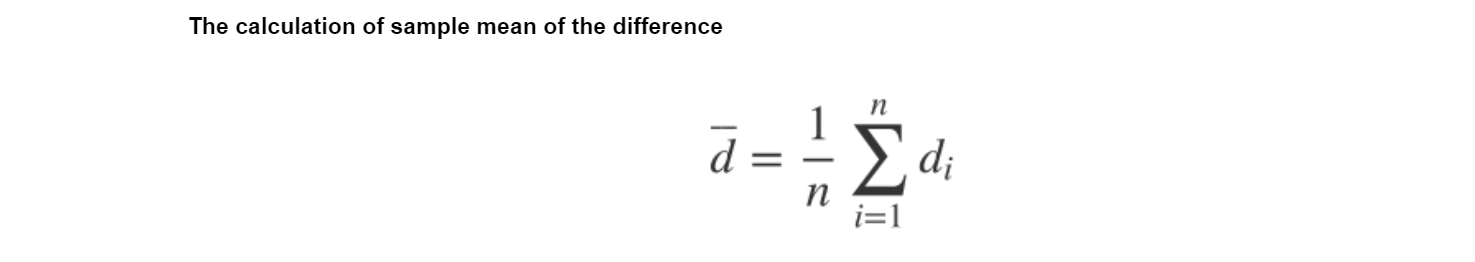

In [179]:
mean_Diff = dfeng_math['English - Math'].mean()
mean_Diff

17.29726130653266

In [182]:
dfeng_math['d-dbar'] = dfeng_math['English - Math'] - mean_Diff

dfeng_math

,English,Math,English - Math,d-dbar
ids,,,,
43783,88.24,60.02,28.22,10.922739
20278,89.45,70.19,19.26,1.962739
20389,96.73,71.20,25.53,8.232739
22820,74.06,55.89,18.17,0.872739
24559,82.61,65.52,17.09,-0.207261
...,...,...,...,...
34021,87.72,65.31,22.41,5.112739
40697,91.01,70.25,20.76,3.462739
34272,81.05,58.16,22.89,5.592739


In [183]:
dfeng_math['d-dbar_sqr'] = dfeng_math['d-dbar']**2

dfeng_math

,English,Math,English - Math,d-dbar,d-dbar_sqr
ids,,,,,
43783,88.24,60.02,28.22,10.922739,119.306221
20278,89.45,70.19,19.26,1.962739,3.852343
20389,96.73,71.20,25.53,8.232739,67.777986
22820,74.06,55.89,18.17,0.872739,0.761673
24559,82.61,65.52,17.09,-0.207261,0.042957
...,...,...,...,...,...
34021,87.72,65.31,22.41,5.112739,26.140097
40697,91.01,70.25,20.76,3.462739,11.990559
34272,81.05,58.16,22.89,5.592739,31.278726


In [184]:
dfeng_math['d-dbar_sqr'].sum()

35852.07711482412

**The calculation of sample standard deviation of the difference:**

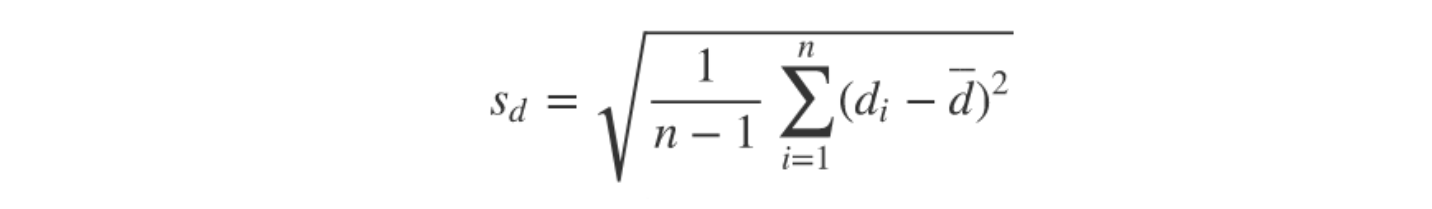

In [186]:
print(len(dfeng_math))
sigma_Diff = math.sqrt(dfeng_math['d-dbar_sqr'].sum()/(len(dfeng_math)-1))
sigma_Diff

398


9.503025782864302

The test statistic for testing H0 against H1 is:

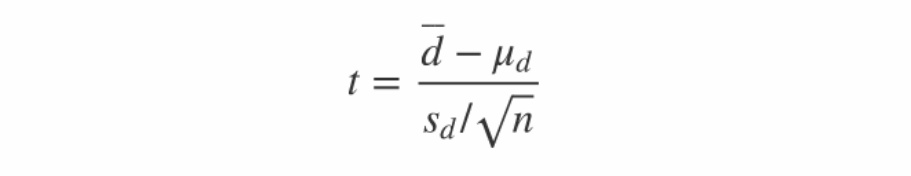

In [187]:
pairedtscore = (mean_Diff-0) / (sigma_Diff/math.sqrt(len(dfeng_math)))

pairedtscore

36.31256898171985

**CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128**

**Cross_check**

In [188]:
dfeng_math_mean = dfeng_math['English - Math'].mean()

In [189]:
dfeng_math_std = dfeng_math['English - Math'].std()

In [190]:
dfeng_math_sqrt = math.sqrt(len(dfeng_math))

In [191]:
dfeng_math_tscore = dfeng_math_mean / (dfeng_math_std / dfeng_math_sqrt)

dfeng_math_tscore

36.31256898171985

Given a t-value and a degrees of freedom, you can use the "survival function" sf of scipy.stats.t (aka the complementary CDF) to compute the **one-sided p-value**. The first argument is the T value, and the second is the degrees of freedom.

In [192]:
# This is the p-value for one-side 

Paired_pvalue1 = sp.stats.t.sf(abs(36.31256898171988), df=397)
Paired_pvalue1

1.5355493596102684e-128

In [193]:
# This is the p-value for two-side 

Paired_pvalue2 = sp.stats.t.sf(abs(36.31256898171988), df=397)*2
Paired_pvalue2

3.071098719220537e-128

**CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128**

From standard normal table, the two-tailed critical value at 0.05% level of significance is **Zα/2 = Z(0.05/2)** --> TABLE --> 0.025 --> **1.965** which is our critical value for t-value comparison.

In [196]:
critical_tscore = 1.965

if pairedtscore > critical_tscore:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


If the calculated p value (3.071098719220689e-128) is less than the critical alpha value (Pα/2 = 0.025), then we reject the null hypothesis (and conclude that the means are significantly different).

In [197]:
critical_pvalue = 0.025

if Paired_pvalue1 < critical_pvalue:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


In [198]:
dfeng_math.head()

,English,Math,English - Math,d-dbar,d-dbar_sqr
ids,,,,,
43783,88.24,60.02,28.22,10.922739,119.306221
20278,89.45,70.19,19.26,1.962739,3.852343
20389,96.73,71.20,25.53,8.232739,67.777986
22820,74.06,55.89,18.17,0.872739,0.761673
24559,82.61,65.52,17.09,-0.207261,0.042957


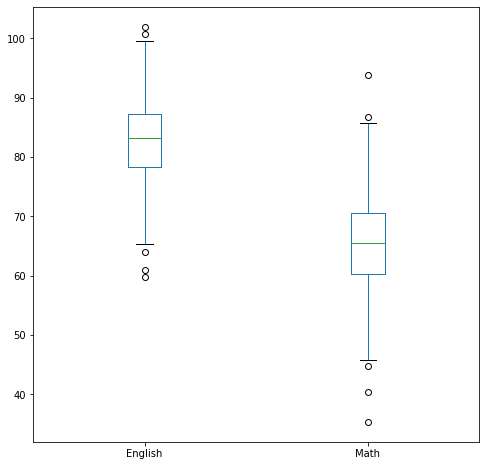

In [199]:
dfeng_math[['English', 'Math']].plot(kind='box', figsize=(8,8));

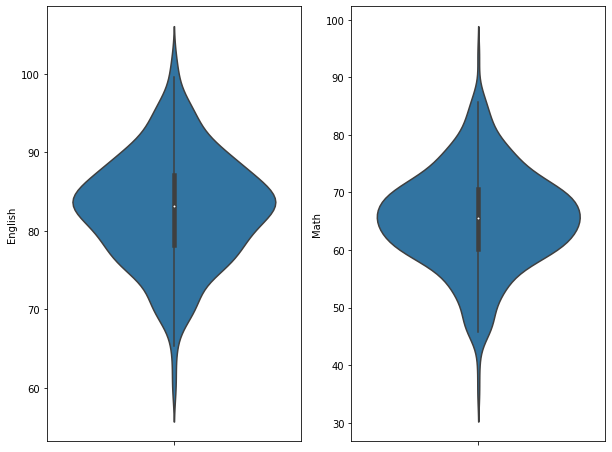

In [200]:
#plt.figure(figsize=(7,5))
fig, axs = plt.subplots(ncols=2, figsize=(10,8))
sns.violinplot(y=dfeng_math['English'], data=dfeng_math, ax=axs[0])
sns.violinplot(y=dfeng_math['Math'], data=dfeng_math, ax=axs[1]);

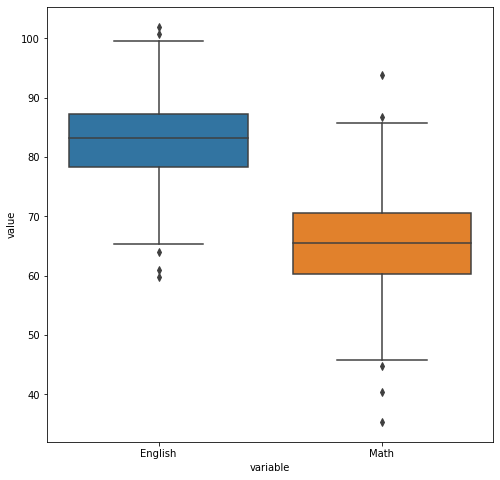

In [201]:
fig, axs = plt.subplots(figsize=(8,8))
df = pd.DataFrame(data=dfeng_math, columns=["English", "Math"])
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

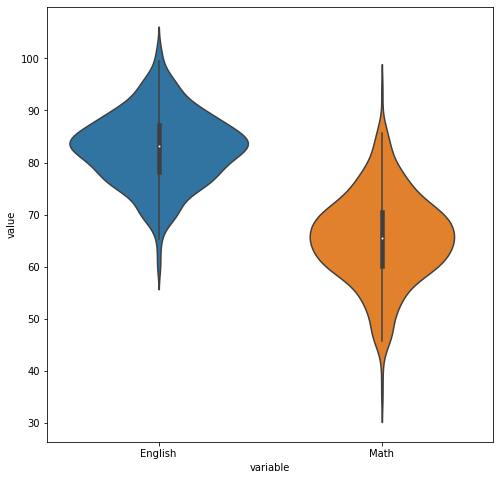

In [202]:
fig, axs = plt.subplots(figsize=(8,8))
df = pd.DataFrame(data=dfeng_math, columns=["English", "Math"])
sns.violinplot(x="variable", y="value", data=pd.melt(df))
plt.show()

**pandas.melt**

pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)[source]
Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where **one or more columns are identifier variables (id_vars)**, while **all other columns, considered measured variables (value_vars)**, are “unpivoted” to the row axis, leaving just two non-identifier columns, **‘variable’ and ‘value’.**

https://pandas.pydata.org/docs/reference/api/pandas.melt.html